In [18]:
! pip install git+https://github.com/rcmalli/keras-vggface.git
!pip install keras_applications --no-deps
filename = "/usr/local/lib/python3.7/dist-packages/keras_vggface/models.py"
text = open(filename).read()
open(filename, "w+").write(text.replace('keras.engine.topology', 'tensorflow.keras.utils'))
import tensorflow as tf

from keras_vggface.vggface import VGGFace

vgg_model1 = VGGFace(model='resnet50',weights='vggface',include_top=False, input_shape=(224, 224, 3)) # or VGGFace() as default

  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-7mm2mbk_
  Running command git clone -q https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-7mm2mbk_


In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import math
from keras.layers import Flatten, Dense, Input


In [20]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [21]:
%cd /content/

/content


In [22]:
!unzip gdrive/My\ Drive/vgg16_dataset/obj.zip

Archive:  gdrive/My Drive/vgg16_dataset/obj.zip
replace test/adityanath/adityanath1_resz.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [23]:
trdata = ImageDataGenerator(rescale=(1./255))
traindata = trdata.flow_from_directory(directory="train",batch_size=1,target_size=(224,224))
tsdata = ImageDataGenerator(rescale=(1./255))
validdata = tsdata.flow_from_directory(directory="test",batch_size=1, target_size=(224,224))


Found 43 images belonging to 4 classes.
Found 40 images belonging to 4 classes.


In [24]:
from keras.models import Model

In [25]:
ls

gdrive/  rcmalli_vggface_tf_notop_resnet50.h5  sample_data/  test/  train/


In [27]:
nb_class = 4
batch_size=1
#vgg_model1 = VGGFace(model='resnet50',include_top=False, input_shape=(224, 224, 3))
vgg_model1.summary()
last_layer = vgg_model1.get_layer('avg_pool').output
x = Flatten(name='flatten')(last_layer)
out = Dense(nb_class, activation='softmax', name='classifier')(x)
custom_vgg_model1 = Model(vgg_model1.input, out)
custom_vgg_model1.summary()
custom_vgg_model1.compile(loss='categorical_crossentropy',
              #optimizer=optimizers.RMSprop(learning_rate=0.001),
              optimizer='Adam',
              metrics=['accuracy'])
history = custom_vgg_model1.fit_generator(
      traindata,
      steps_per_epoch=math.ceil(traindata.samples//batch_size),
      epochs=10,
      verbose=1,
      validation_data = validdata,
      validation_steps=math.ceil(validdata.samples//batch_size))

Model: "vggface_resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1/7x7_s2 (Conv2D)           (None, 112, 112, 64) 9408        input_4[0][0]                    
__________________________________________________________________________________________________
conv1/7x7_s2/bn (BatchNormaliza (None, 112, 112, 64) 256         conv1/7x7_s2[0][0]               
__________________________________________________________________________________________________
activation_147 (Activation)     (None, 112, 112, 64) 0           conv1/7x7_s2/bn[0][0]            
___________________________________________________________________________________

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


43/43 [==============================] - 59s 123ms/step - loss: 3.0521 - accuracy: 0.3488 - val_loss: 102762.2500 - val_accuracy: 0.2500
Epoch 2/10
43/43 [==============================] - 4s 98ms/step - loss: 2.2303 - accuracy: 0.3721 - val_loss: 60297.3125 - val_accuracy: 0.2500
Epoch 3/10
43/43 [==============================] - 4s 99ms/step - loss: 1.7954 - accuracy: 0.3488 - val_loss: 941.0714 - val_accuracy: 0.2500
Epoch 4/10
43/43 [==============================] - 4s 99ms/step - loss: 1.7071 - accuracy: 0.3256 - val_loss: 30.5772 - val_accuracy: 0.2500
Epoch 5/10
43/43 [==============================] - 4s 99ms/step - loss: 1.5967 - accuracy: 0.4419 - val_loss: 24.0514 - val_accuracy: 0.2500
Epoch 6/10
43/43 [==============================] - 4s 100ms/step - loss: 1.4483 - accuracy: 0.4884 - val_loss: 16.3145 - val_accuracy: 0.2500
Epoch 7/10
43/43 [==============================] - 4s 100ms/step - loss: 1.1165 - accuracy: 0.5349 - val_loss: 59.9208 - val_accuracy: 0.2500
Epoch

**model has high variance as of now**

Saving adityanath2_resz.jpg to adityanath2_resz.jpg


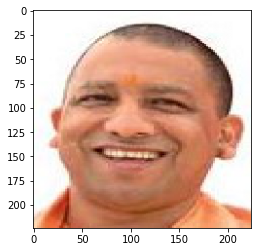

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  #img=img.astype('float32')
  
  img = np.asarray(img)
  img =img/ 255.0
  plt.imshow(img)
  img = np.expand_dims(img, axis=0)

In [11]:
classes = custom_vgg_model1.predict(img)
a=classes[0]
pos=np.argmax(a)
if pos==0:
  print("ad")
elif pos==1:
  print("modi")
elif pos==2:
  print("rahul")
elif pos==3:
  print("random")


rahul
